In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df = df.drop(columns=[
    'type',
    'id',
    'subreddit.id',
    'subreddit.nsfw',
    'permalink',
    'domain',
    'url',
    'selftext',
])
df['created_utc'] = (pd.to_datetime(df['created_utc'], unit='s')) # change unix time stamp to datetime
df = df.rename(columns={'created_utc' : 'created', 'score' : 'votes'})

In [5]:
df.query("votes > 100000") # posts with more than 100k upvotes

,subreddit.name,created,title,votes
37191,holup,2021-10-15 08:24:51,Before &amp; After COVID Vaccine,106027
216179,leopardsatemyface,2021-09-02 04:32:51,Candace Owens tried to get a COVID test in Asp...,123826
219126,news,2021-09-01 18:59:50,Reddit bans active COVID misinformation subred...,108642
659619,mademesmile,2021-05-31 22:17:21,4 shifts in a row without a single COVID-19 case,116628
1175254,mademesmile,2021-03-22 04:29:14,"Spent the second half of 2020 homeless, NYE in...",109318
...,...,...,...,...
4290896,coronavirus,2020-03-22 15:41:45,Gino Fasoli was 73 years old. He was italian a...,122966
4334111,aww,2020-03-19 22:02:12,The shelter was clearing out for COVID-19 and ...,112601
4399873,pics,2020-03-16 00:42:14,Worker spraying the streets to prevent Covid 1...,174996
4447970,worldnews,2020-03-12 15:21:41,Brazilian spokesperson tests positive for COVI...,118737


In [6]:
df = df.sort_values(by=['created'], ascending=True) # sorting by the oldest posts
df = df.reset_index(drop=True)
df.head(8)

,subreddit.name,created,title,votes
0,technology,2012-01-19 17:19:47,Innovative Covid Products at ISE 2012,1
1,pics,2015-01-17 20:48:40,Vintage style covid.,1
2,u_shriya-mehta-blog,2018-08-10 05:27:41,Covid | Covid | Mediart Life Sciences,1
3,u_yanasr1,2018-09-26 08:20:11,Covid | Covid | Mediart Life Sciences,1
4,u_yanasr1,2018-11-29 08:13:43,"Covid |""Covid Capsule""",1
5,nullthworldproblems,2019-09-02 14:11:32,regathered covid parenteral shellfish syntheti...,1
6,nullthworldproblems,2019-09-17 11:08:08,covid hemistichal reconsolidating sciurus over...,1
7,coronavirus,2020-02-11 15:10:58,COVID-19 is the official name of the virus,3


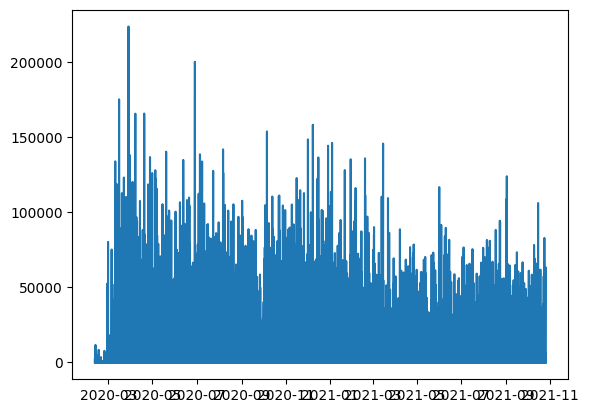

In [7]:
x = df['created'][7:]
y = df['votes'][7:]
plt.plot(x, y)
plt.show() # plot of number of votes per post across time

subreddit.name
u_toronto_news    850399
autonewspaper     161474
coronavirus       108614
askreddit          84743
news               70275
covid_canada       56844
newsbotbot         55907
worldnews          44317
ddnews             41427
politics           30881
Name: title, dtype: int64

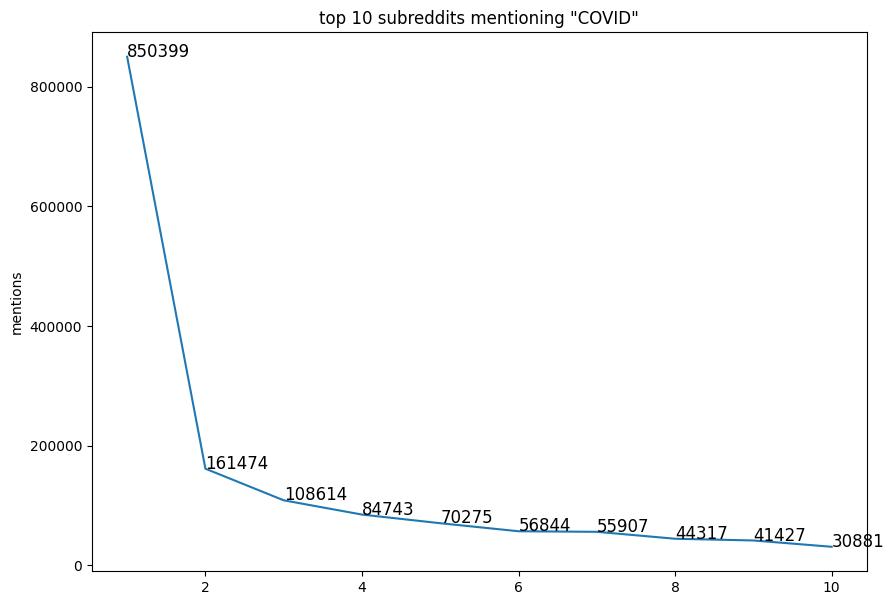

In [33]:
# look at posts grouped by their subreddit
grouped_old = df.groupby('subreddit.name')
grouped = grouped_old.aggregate(np.count_nonzero).sort_values(by='title', ascending=False) # sorting by most posted-to subreddit

y = grouped['title'][:10] # looking at top 10
x = np.linspace(start=1, stop=10, num=10)

fig, ax = plt.subplots(figsize=(10,7))
plt.plot(x, y)
plt.title('top 10 subreddits mentioning "COVID"')
plt.ylabel('mentions')
for i in range(len(x)):
      ax.text(x[i], y[i], (y[i]), size=12)
y
